### Gaussian propagation
Based on the practitioners guide, we first simulate a focussed gaussian field in the Crank-Nicolson scheme, the fourier scheme and the analytical solution for quanitfying the accuracies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nbimporter
from crank_nicolson import time_independent 

import importlib
importlib.reload(time_independent)
pass

### Crank-Nicolson
Practitioners guide page 41.

In [2]:
# all units in mm
omega_0 = 0.01 # beam waist
lamb = 1030e-6 # wavelength
f = 0.2 # focal length of lense
n0 = 1.5 # refrective index
k0 = n0 * 2 * np.pi / lamb



In [3]:
grid = time_independent.Grid()
grid.generate_radial_grid(N = 255, r_min = 0, r_max = 0.2)
grid.generate_propagation_grid(N = 1024*4, z_0=0, z_max=0.4)

In [14]:
propagator = time_independent.Propagator(grid)
propagator.set_initial_conditions(omega_0, lamb, f, n0)
#propagator.check_stability()

In [5]:
propagator.propagate()

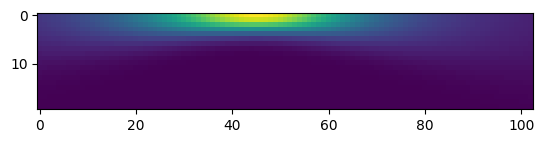

In [10]:
plt.imshow(propagator.I_final[:20,::40])

### Analytical solution
Page 39 in practitioners guide

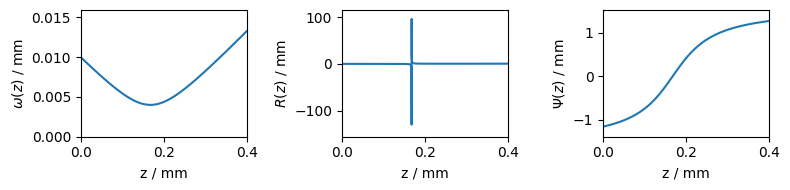

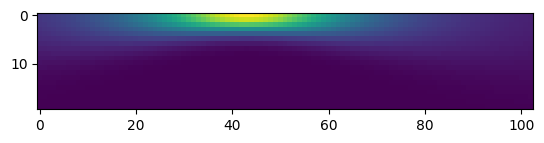

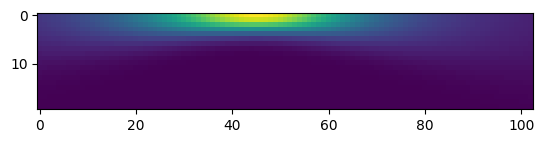

In [13]:
def analytical_w(z):
    a = (1-z/f)**2
    z_R = k0*omega_0**2/2
    b = z**2/z_R**2
    return omega_0*(a + b)**0.5

def analytical_R(z):
    z_R = k0*omega_0**2/2
    df = f/(1+f**2/z_R**2)
    return z-df + (df * (f - df)) / (z - df)

def analytical_Psi(z):
    z_R = k0*omega_0**2/2
    df = f/(1+f**2/z_R**2)
    return np.arctan((z-df) / (f*df-df**2)**0.5)

fig, axarr = plt.subplots(1,3, figsize=[8,2])
axarr[0].plot(grid.z, analytical_w(grid.z))
axarr[0].axis([grid.z_0, grid.z_max, grid.r_min, analytical_w(grid.z).max()*1.2])
axarr[0].set_xlabel('z / mm')
axarr[0].set_ylabel(r'$\omega(z)$ / mm')

axarr[1].plot(grid.z, analytical_R(grid.z))
axarr[1].axis([grid.z_0, grid.z_max, analytical_R(grid.z).min()*1.2, analytical_R(grid.z).max()*1.2])
axarr[1].set_xlabel('z / mm')
axarr[1].set_ylabel(r'$R(z)$ / mm')

axarr[2].plot(grid.z, analytical_Psi(grid.z))
axarr[2].axis([grid.z_0, grid.z_max, analytical_Psi(grid.z).min()*1.2, analytical_Psi(grid.z).max()*1.2])
axarr[2].set_xlabel('z / mm')
axarr[2].set_ylabel(r'$\Psi(z)$ / mm')


plt.tight_layout()
plt.show()

def analytical_E(r,z):
    a = 1* omega_0 / analytical_w(z)
    b = r**2 / analytical_w(z)**2
    c = 1j * k0 * r**2 / (2 * analytical_R(z))
    d = 1j * analytical_Psi(z)

    return a * np.exp(-b +c -d)

E_analytical_final = analytical_E(*np.meshgrid(grid.r,grid.z)).T
I_analytical_final = np.abs(E_analytical_final)**2
plt.imshow(I_analytical_final[:20,::40])
plt.show()

plt.imshow(propagator.I_final[:20,::40])
plt.show()

max error: 5.1 percent


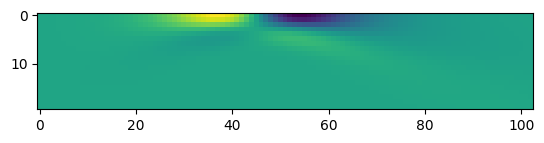

In [12]:
difference = I_analytical_final[:20,::40] -  propagator.I_final[:20,::40]
print('max error: %.1f percent'%(np.max(difference) / I_analytical_final[:20,::40].max() * 100))
plt.imshow(difference)
plt.show()